#### Кафедра дискретной математики МФТИ

#### Курс математической статистики

Игашов Илья, 593 групппа

#  Задание №5

## №1. 

Пусть $\xi=(\xi_1,\xi_2)\sim N(a,\Sigma),$ где $a=\begin{pmatrix}1\\4\end{pmatrix}$ и $\Sigma=\begin{pmatrix}10 & 8\\ 8 & 10\end{pmatrix}$. Постройте график плотности этого случайного вектора. Для $y\in\{−3, 0, 1, 5\}$ постройте графики $f_{\xi_1|\xi_2}(x|y)$. Построить график $E(\xi_1|\xi_2 = y)$ в зависимости от $y$ и проведите на этом графике прямую $x = E\xi_1.$

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from scipy.stats import norm

%matplotlib inline

In [73]:
a = np.array([1, 4])
covar = np.array([[10, 8], [8, 10]])

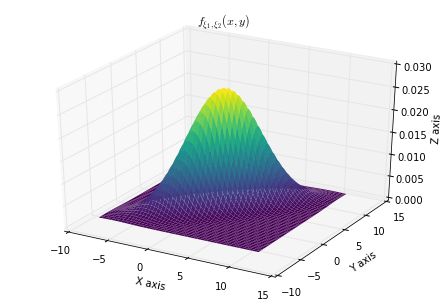

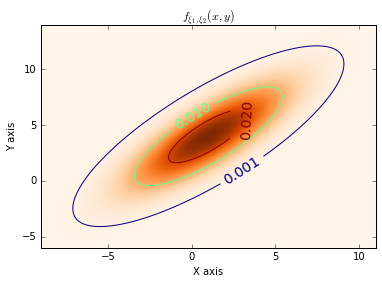

In [78]:
# Create grid and multivariate normal.
x = np.linspace(a[0] - 10, a[0] + 10, 500)
y = np.linspace(a[1] - 10, a[1] + 10, 500)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# Make a 3D plot.
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, multivariate_normal.pdf(pos, a, covar), cmap='viridis', linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title(r'$f_{\xi_1,\xi_2}(x,y)$')
plt.show()

# Make a pcolormesh.
plt.figure()
plt.pcolormesh(X, Y, multivariate_normal.pdf(pos, a, covar),  cmap='Oranges')
CS = plt.contour(X, Y, multivariate_normal.pdf(pos, a, covar), [0.001, 0.01, 0.02])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f', cmap='Set3')
plt.title(r'$f_{\xi_1,\xi_2}(x,y)$')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

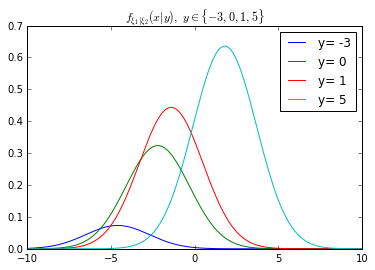

In [75]:
# Plot of conditional density function for y = -3, 0, 1, 5.
plt.figure()
for y in [-3, 0, 1, 5]:
    X = np.array([(x, y) for x in np.linspace(-10, 10, 500)])
    plt.plot(np.linspace(-10, 10, 500), 
             multivariate_normal.pdf(X, a, covar) / norm.pdf(y, 4, 10), 
             label=('y= ' + str(y)))
    plt.title(r'$f_{\xi_1|\xi_2}(x|y), \ y\in\{-3,0,1,5\}$')
    plt.legend()
    plt.grid()
plt.show()

### Посчитаем условное математическое ожидание $E(\xi_1|\xi_2)$:
Пусть $\xi_1=\alpha \xi_2+\eta, \ \ \eta=\xi_1-\alpha \xi_2,$ 

$cov(\eta,\xi_2)=cov(\xi_1,\xi_2)-\alpha D(\xi_2)=8-10\alpha=0.$

Отсюда: $\alpha = 0.8, \ \ E(\xi_1|\xi_2)=\alpha E(\xi_2|\xi_2)+E(\eta|\xi_2)=\alpha \xi_2 + E\eta = \alpha \xi_2+E\xi_1-\alpha E\xi_2 = 0.8\xi_2-2.2.$

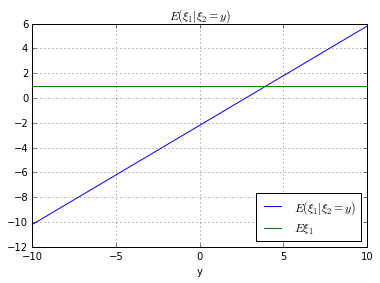

In [71]:
# Plot of conditional expectation.
grid = np.linspace(-10, 10, 500)
plt.plot(grid, 0.8 * grid - 2.2, label=r'$E(\xi_1|\xi_2=y)$')
plt.plot(grid, np.ones(500), label=r'$E\xi_1$')
plt.title(r'$E(\xi_1|\xi_2=y)$')
plt.legend(loc=4)
plt.xlabel('y')
plt.grid()
plt.show()

# Вывод

Мы рассмотрели нормально распределенный случайный вектор $(\xi_1,\xi_2)$, построили график плотности его распределения, а также рассмотрели условную плотность и условное математическое ожидание случайной величины $\xi_1$ относительно  $\xi_2$. Случайные величины $\xi_1$ и $\xi_2$ кореллируют, и значит, что УМО $E(\xi_1|\xi_2)$ является, фактически, "уточненным значением" математического ожидания случайной величины $\xi_1$, которое мы узнаем благодаря случайной величине $\xi_2$, от которой зависит $\xi_1$ (по графикам условных плоностей $f_{\xi_1|\xi_2}$ при разлиных $y$ это видно: например, при различных $y$ максимум достигается на разных значениях $x$; также если проводить сечения $y=const$ на графике двумерной плотности, то видно, что значения математического ожидания величины $\xi_1$ меняются).

$E(\xi_1|\xi_2)$ - сама по себе $\mathcal{F}_{\xi_2}$ - измеримая случайная величина (ее выражение в явном виде выведено выше).

$E(\xi_1|\xi_2=y)$ - борелевская функция $\psi(y)$, смысл которой - значение математического ожидания величины $\xi_1$ при условии, что $\xi_2 = y$.

Из последнего графика видно, что $E(\xi_1|\xi_2 = E\xi_2) = E(\xi_1)$. Это логично, если в графике плотности вектора $(\xi_1,\xi_2)$ провести сечение $y = E\xi_2 = 4$, то видно, что  $E\xi_1=1$.